In [ ]:
Finding How The Data Is Distributed

Objectives:

Understand the structure of the dataset.

Perform summary statistics and data visualization.

Identify trends in developer experience, tools, job satisfaction, and other key variables.

In [6]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [ ]:
Step 2: Examine the Structure of the Data
Display the column names, data types, and summary information to understand the data structure.

Objective: Gain insights into the dataset's shape and available variables.



In [8]:
# Display column names
print("Column Names:")
print(df.columns)

# Display data types
print("\nData Types:")
print(df.dtypes)

# Display summary information
print("\nDataFrame Info:")
print(df.info())

# Display summary statistics for all columns (including categorical)
print("\nSummary Statistics:")
print(df.describe(include='all'))


Column Names:
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

Data Types:
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

Summary 

In [ ]:
Step 3: Handle Missing Data
Identify missing values in the dataset.

Impute or remove missing values as necessary to ensure data completeness.

In [ ]:
#Identify Missing Values per column:
Identify Missing Values
Use the following to see how many values are missing per column:

In [18]:
#Understand the Impact
#Check what percentage of data is missing per column:

# Percentage of missing data per column
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0]
print("\nPercentage of Missing Values:")
print(missing_percent.sort_values(ascending=False))




Percentage of Missing Values:
AINextMuch less integrated    98.245641
AINextLess integrated         96.401119
AINextNo change               80.900714
AINextMuch more integrated    79.464217
EmbeddedAdmired               74.428840
                                ...    
YearsCode                      8.508948
NEWSOSites                     7.871693
LearnCode                      7.563000
EdLevel                        7.110656
AISelect                       6.922689
Length: 109, dtype: float64


In [ ]:
#Handle Missing Data
#choose to drop or impute missing values depending on the importance of each column:

In [19]:
# Show columns with missing values
missing_cols = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:")
print(missing_cols)


Columns with missing values:
['RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired', '

In [20]:
# Drop columns with more than 50% missing values
df_cleaned = df.dropna(thresh=len(df)*0.5, axis=1)



In [21]:
# Alternatively, drop rows with any missing values (use with caution)
df_cleaned = df.dropna()


In [ ]:
#Impute missing values
➤ For categorical (object or string) columns: fill with the mode.
➤ For numeric columns: fill with the median.


In [22]:
# Loop through remaining columns with missing values
for col in df.columns[df.isnull().any()]:
    if df[col].dtype == 'object':
        # Fill categorical columns with the most frequent value
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        # Fill numeric columns with the median
        df[col] = df[col].fillna(df[col].median())


In [ ]:
Step 4: Analyze Key Columns
Examine key columns such as Employment, JobSat (Job Satisfaction), and YearsCodePro (Professional Coding Experience).

Instruction: Calculate the value counts for each column to understand the distribution of responses.

In [23]:
# Employment distribution
print("Employment Distribution:")
print(df['Employment'].value_counts(dropna=False))
print("\n")

# Job Satisfaction distribution
print("JobSat (Job Satisfaction) Distribution:")
print(df['JobSat'].value_counts(dropna=False))
print("\n")

# Years of Professional Coding Experience distribution
print("YearsCodePro (Professional Coding Experience) Distribution:")
print(df['YearsCodePro'].value_counts(dropna=False))
print("\n")


Employment Distribution:
Employment
Employed, full-time                                                                                                                                  39041
Independent contractor, freelancer, or self-employed                                                                                                  4846
Student, full-time                                                                                                                                    4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                              3557
Not employed, but looking for work                                                                                                                    2341
                                                                                                                                                     ...  
Employed, full-time;Student, full-

In [ ]:
Step 5: Visualize Job Satisfaction (Focus on JobSat)
Create a pie chart or KDE plot to visualize the distribution of JobSat.

Provide an interpretation of the plot, highlighting key trends in job satisfaction.

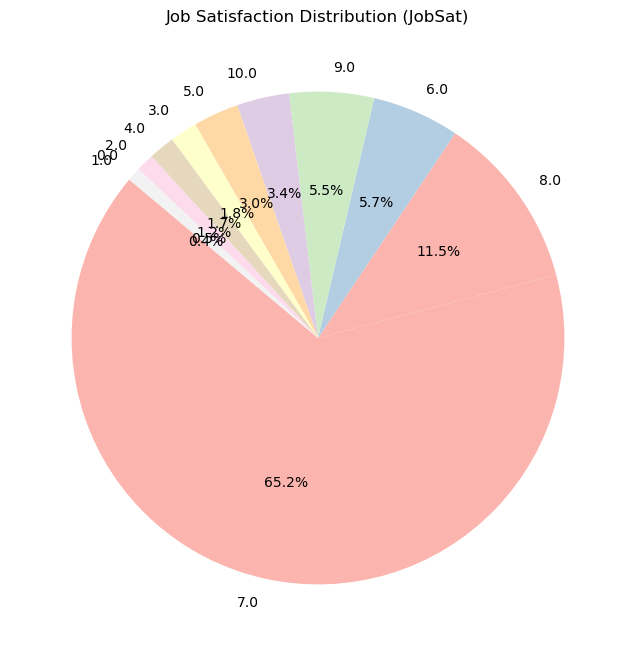

In [24]:
# Pie Chart — shows proportion of each satisfaction level
import matplotlib.pyplot as plt

# Prepare data
job_sat_counts = df['JobSat'].value_counts(dropna=True)

# Plot pie chart
plt.figure(figsize=(8, 8))
job_sat_counts.plot.pie(autopct='%1.1f%%', startangle=140, cmap='Pastel1')
plt.title('Job Satisfaction Distribution (JobSat)')
plt.ylabel('')  # Hide y-label
plt.show()


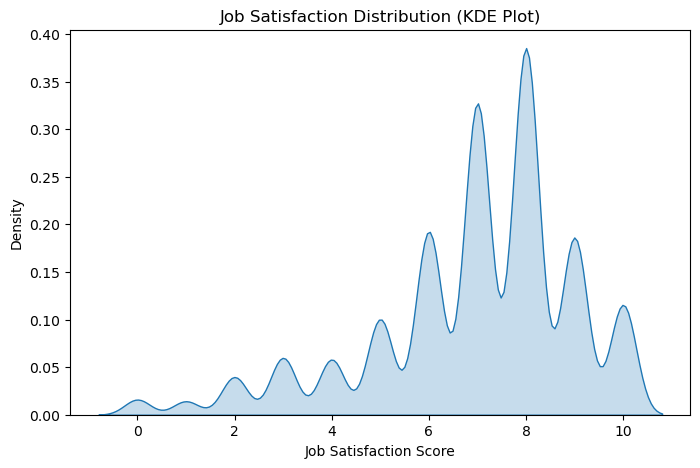

In [2]:
# KDE Plot — smooth distribution (works if JobSat is numeric or ordered categorical)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)
job_sat_numeric = pd.to_numeric(df['JobSat'], errors='coerce').dropna()

plt.figure(figsize=(8, 5))
sns.kdeplot(job_sat_numeric, fill=True)
plt.title('Job Satisfaction Distribution (KDE Plot)')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Density')
plt.show()


In [ ]:
Interpretation of JobSat Distribution:
Pie chart shows how respondents are distributed among satisfaction categories — you might see a large chunk reporting “Satisfied” or “Very satisfied,” or maybe a notable percentage unhappy.

KDE plot highlights peaks in satisfaction scores, showing whether the distribution is skewed toward high, low, or moderate satisfaction.

In [ ]:
Step 6: Programming Languages Analysis
Compare the frequency of programming languages in LanguageHaveWorkedWith and LanguageWantToWorkWith.

Visualize the overlap or differences using a Venn diagram or a grouped bar chart.

In [3]:
# Extract and count languages from both columns
from collections import Counter

# Helper function to split and count languages
def count_languages(column):
    all_langs = df[column].dropna().str.split(';').sum()
    return Counter(all_langs)

# Count languages people have worked with
worked_with_counts = count_languages('LanguageHaveWorkedWith')

# Count languages people want to work with
want_to_work_counts = count_languages('LanguageWantToWorkWith')


In [4]:
#Create a DataFrame to compare counts side by side
import pandas as pd

# Create DataFrame from counts
lang_df = pd.DataFrame({
    'Have Worked With': pd.Series(worked_with_counts),
    'Want to Work With': pd.Series(want_to_work_counts)
}).fillna(0)

# Sort by "Have Worked With" counts descending
lang_df = lang_df.sort_values(by='Have Worked With', ascending=False)


<Figure size 1200x800 with 0 Axes>

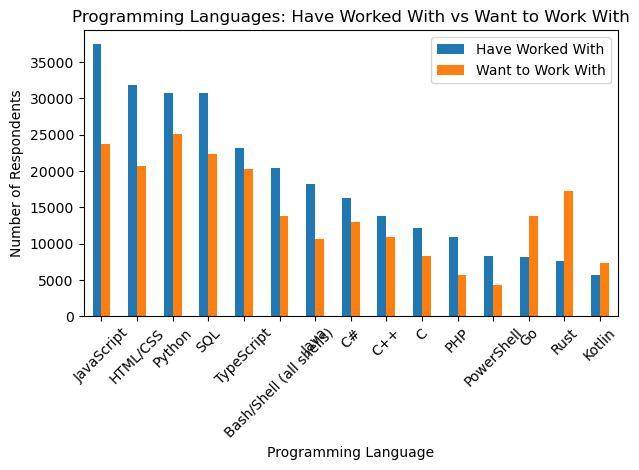

In [5]:
#Visualize with a grouped bar chart
import matplotlib.pyplot as plt

# Plot top 15 languages for clarity
top_langs = lang_df.head(15)

plt.figure(figsize=(12, 8))
top_langs.plot(kind='bar')
plt.title('Programming Languages: Have Worked With vs Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [4]:
#Venn Diagram for overlap (if you want to highlight overlap)
!pip install matplotlib-venn


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45437 sha256=986421f772c44df6d65dfb155e600bf1711f19e2c0a14980464be70ce9422adc
  Stored in directory: c:\users\nguif\appdata\local\pip\cache\wheels\c2\47\0c\f014c55a1cfd56dce41a1cafd23e3c590652b5e71330cc181c
Successfully built matplotlib-venn


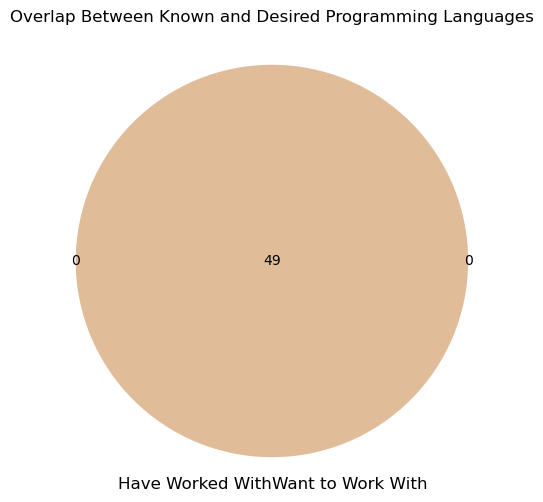

In [6]:
from matplotlib_venn import venn2

# Sets of languages
worked_with_set = set(worked_with_counts.keys())
want_to_work_set = set(want_to_work_counts.keys())

plt.figure(figsize=(8, 6))
venn2([worked_with_set, want_to_work_set], 
      set_labels=('Have Worked With', 'Want to Work With'))
plt.title('Overlap Between Known and Desired Programming Languages')
plt.show()


In [ ]:
Step 7: Analyze Remote Work Trends

In [ ]:
#Check the distribution of remote work types
print("Remote Work Distribution:")
print(df['RemoteWork'].value_counts(dropna=False))


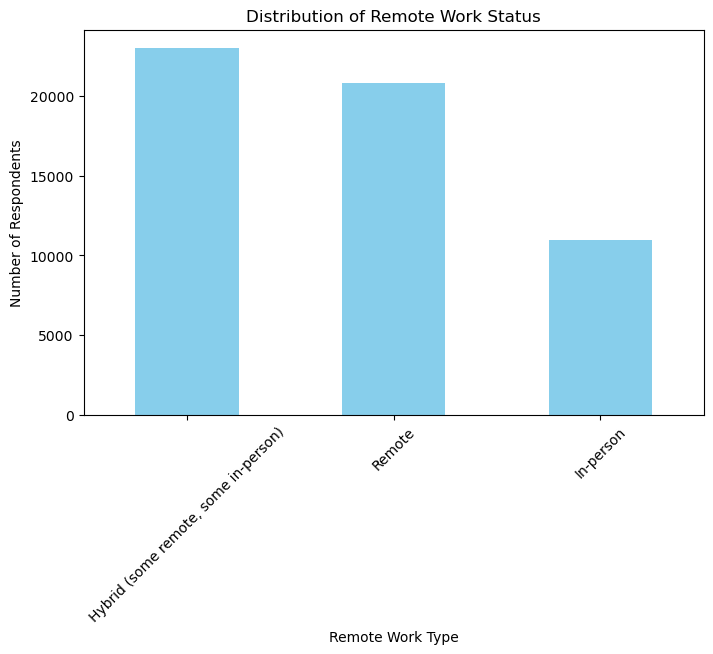

In [7]:
#Visualize remote work status
import matplotlib.pyplot as plt

remote_counts = df['RemoteWork'].value_counts(dropna=True)

plt.figure(figsize=(8, 5))
remote_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Remote Work Status')
plt.xlabel('Remote Work Type')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()



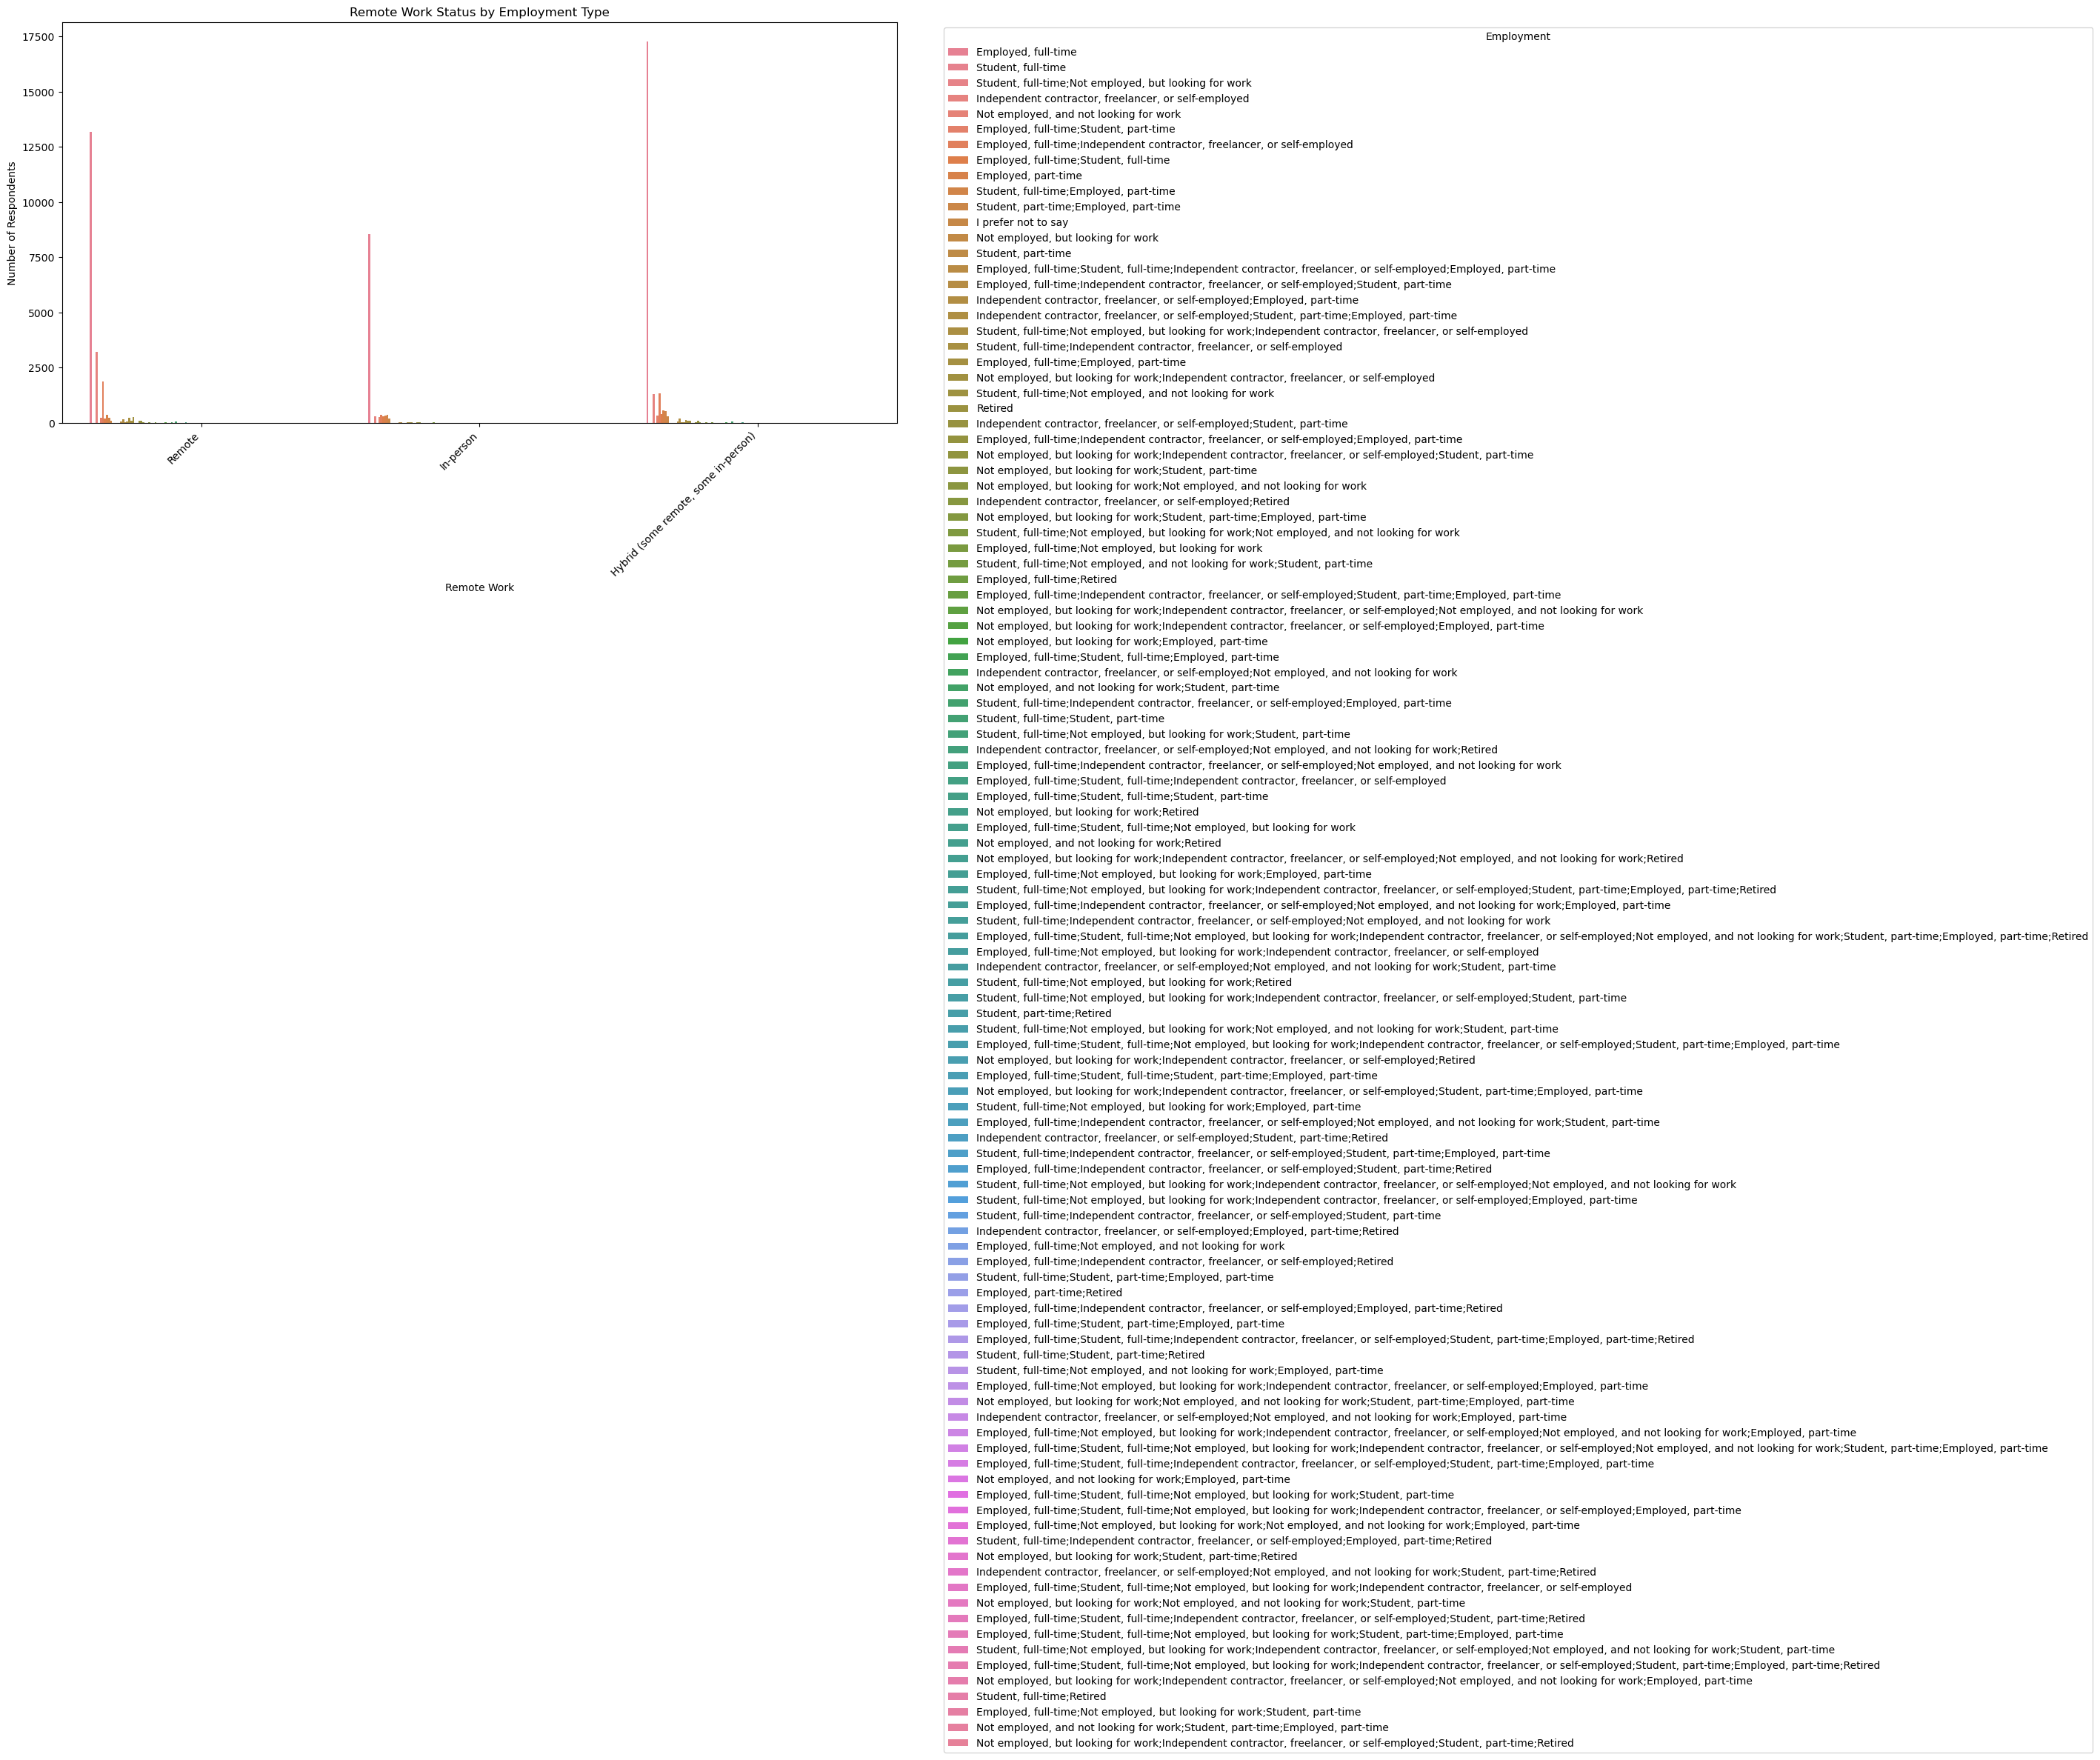

In [33]:
#Explore relationship between RemoteWork and Employment
import matplotlib.pyplot as plt
import seaborn as sns

# Clean figure setup — no reuse of old figures
fig, ax = plt.subplots(figsize=(12, 6))
fig.tight_layout()

# Plot directly on the correct Axes object
sns.countplot(data=df, x='RemoteWork', hue='Employment', ax=ax)

# Set titles and labels
ax.set_title('Remote Work Status by Employment Type')
ax.set_xlabel('Remote Work')
ax.set_ylabel('Number of Respondents')

# Rotate x-axis labels properly
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha('right')

# Legend placed clearly
ax.legend(title='Employment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot 
plt.show()





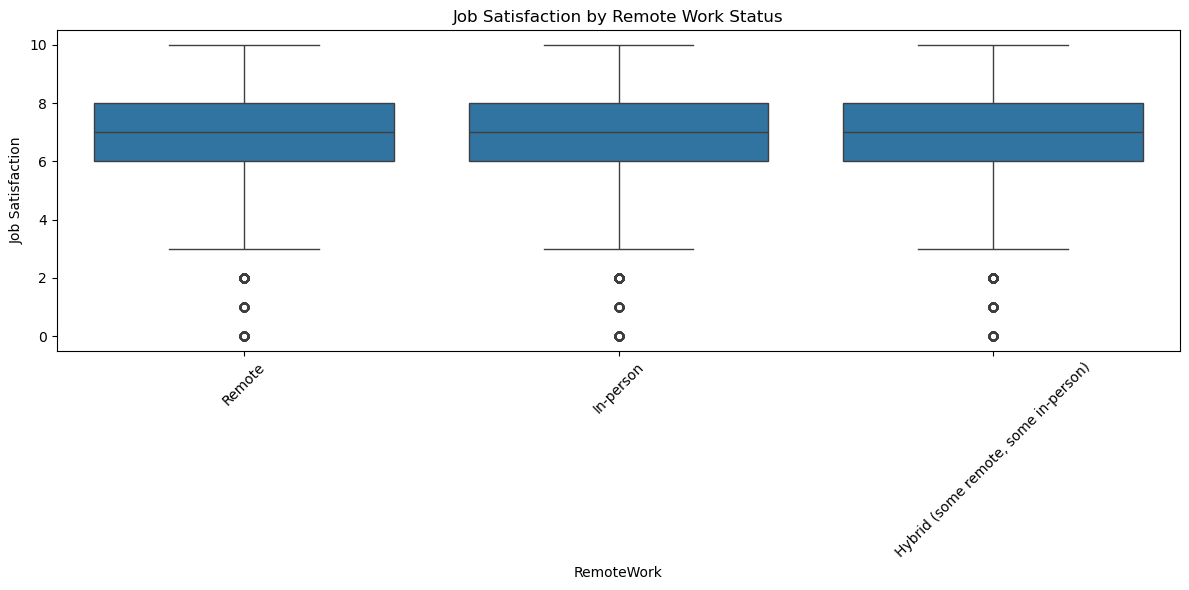

In [9]:
#Remote Work vs Job Satisfaction

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='RemoteWork', y='JobSat')
plt.title('Job Satisfaction by Remote Work Status')
plt.xticks(rotation=45)
plt.ylabel('Job Satisfaction')
plt.tight_layout()
plt.show()


In [ ]:
Step 8: Correlation between Job Satisfaction and Experience
Analyze the correlation between overall job satisfaction (JobSat) and YearsCodePro.

Calculate the Pearson or Spearman correlation coefficient.

In [11]:
#Prepare the data
# Convert columns to numeric, coercing errors to NaN
job_sat_numeric = pd.to_numeric(df['JobSat'], errors='coerce')
years_code_pro_numeric = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Create a DataFrame with both columns and drop rows with NaN
corr_df = pd.DataFrame({
    'JobSat': job_sat_numeric,
    'YearsCodePro': years_code_pro_numeric
}).dropna()


In [12]:
#Calculate correlations
# Pearson correlation
pearson_corr = corr_df['JobSat'].corr(corr_df['YearsCodePro'], method='pearson')

# Spearman correlation
spearman_corr = corr_df['JobSat'].corr(corr_df['YearsCodePro'], method='spearman')

print(f"Pearson correlation between JobSat and YearsCodePro: {pearson_corr:.3f}")
print(f"Spearman correlation between JobSat and YearsCodePro: {spearman_corr:.3f}")


Pearson correlation between JobSat and YearsCodePro: 0.103
Spearman correlation between JobSat and YearsCodePro: 0.121


In [ ]:
Interpretation:
Values close to 1 or -1 indicate strong positive or negative correlation.

Values close to 0 indicate weak or no correlation.

Spearman is better if the relationship might be monotonic but not linear.

In [ ]:
Step 9: Cross-tabulation Analysis (Employment vs. Education Level)
Analyze the relationship between employment status (Employment) and education level (EdLevel).

Instruction: Create a cross-tabulation using pd.crosstab() and visualize it with a stacked bar plot if possible.

In [13]:
#Create the cross-tabulation table
import pandas as pd

crosstab = pd.crosstab(df['Employment'], df['EdLevel'], dropna=False)
print(crosstab)


EdLevel                                             Associate degree (A.A., A.S., etc.)  \
Employment                                                                                
Employed, full-time                                                                1059   
Employed, full-time;Employed, part-time                                               9   
Employed, full-time;Independent contractor, fre...                                  104   
Employed, full-time;Independent contractor, fre...                                   11   
Employed, full-time;Independent contractor, fre...                                    0   
...                                                                                 ...   
Student, full-time;Student, part-time;Employed,...                                    0   
Student, full-time;Student, part-time;Retired                                         0   
Student, part-time                                                                   12   

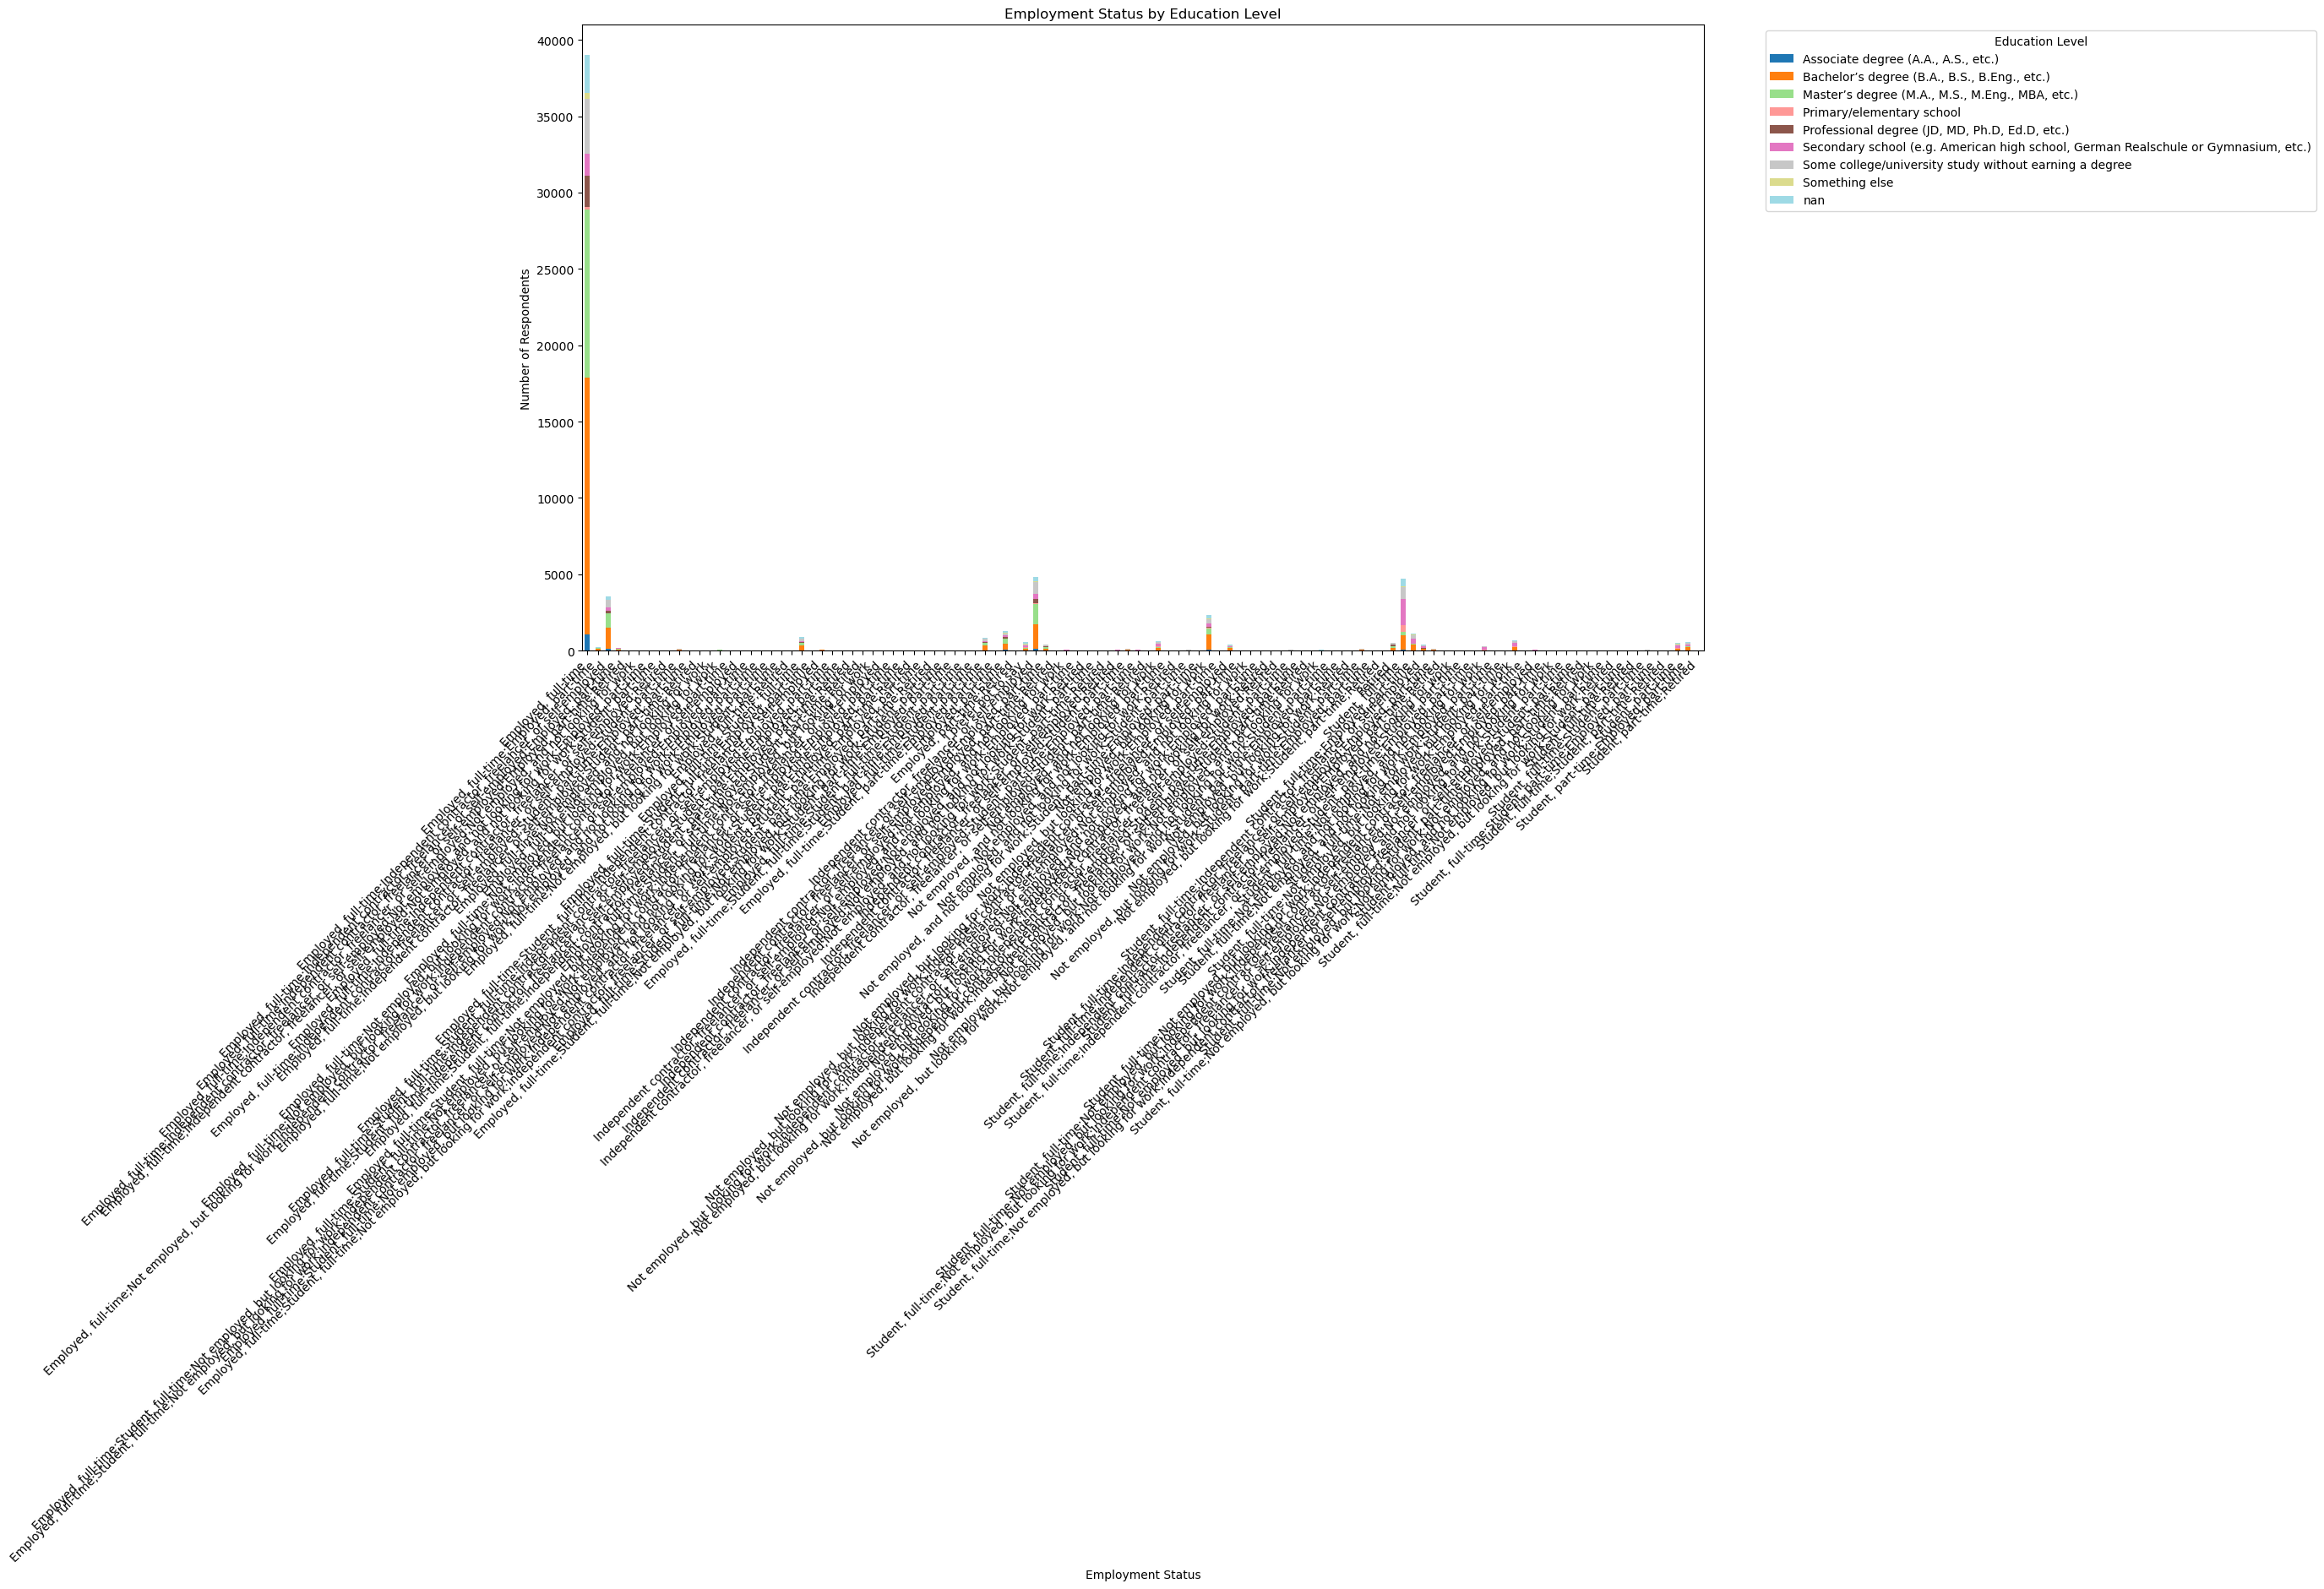

In [30]:
#Visualize with a stacked bar chart
import matplotlib.pyplot as plt

# Create figure and axis with constrained layout
fig, ax = plt.subplots(figsize=(14, 8))
fig.tight_layout()


# Your plotting code here using `ax`
crosstab.plot(kind='bar', stacked=True, colormap='tab20', ax=ax)

# Customize the chart
ax.set_title('Employment Status by Education Level')
ax.set_xlabel('Employment Status')
ax.set_ylabel('Number of Respondents')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [34]:
# Save cleaned DataFrame as 'lab 13.csv' to the specified folder
save_path = r"C:\Users\nguif\Desktop\N Power\Capstone Project\lab 13.csv"
df.to_csv(save_path, index=False)
